# How To Build a Search Engine




## Step 1: The Crawler - Finding Links, Content & Getting Pages

In [ ]:
import requests

main_subject = 'SEO'

url = 'https://en.wikipedia.org/w/api.php'
params = {
        'action': 'query',
        'format': 'json',
        'generator':'links',
        'titles': main_subject,
        'prop':'pageprops',
        'ppprop':'wikibase_item',
        'gpllimit':1000,
        'redirects':1
        }

r = requests.get(url, params=params)
r_json = r.json()
linked_pages = r_json['query']['pages']

links = [p['title'] for p in linked_pages.values()]

## Show All Page Links

In [ ]:
links

['File:Search engine optimization.ogg',
 'A List Apart',
 'Ad blocking',
 'Affiliate marketing',
 'Algorithm',
 'BERT (language model)',
 'BMW',
 'Backlink',
 'Baidu',
 'Barry Schwartz (technologist)',
 'Browser engine',
 'CNET',
 'Cache (computing)',
 'Canonical link element',
 'Chromium (web browser)',
 'Cloaking',
 'Competitor backlinking',
 'Content farm',
 'Content marketing',
 'Contextual advertising',
 'Cost per action',
 'Cost per impression',
 'DMOZ',
 'Danny Sullivan (technologist)',
 'Data model',
 'Diagram',
 'Email marketing',
 'Federal Rules of Civil Procedure',
 'Flash animation',
 'Forbes',
 'Gaming the system',
 'Geotargeting',
 'Google',
 'Google Chrome',
 'Google Hummingbird',
 'Google I/O',
 'Google Panda',
 'Google Penguin',
 'Google Search Console',
 'Grey hat',
 'HTML',
 'HTTPS',
 'Hitwise',
 'Human search engine',
 'IP address',
 'Infoseek',
 'Internet',
 'Jakob Nielsen (usability consultant)',
 'JavaScript',
 'Jill Whalen',
 'Keyword density',
 'Keyword researc

In [ ]:
print(f'Total number of links in the SEO page are: {len(links)}')

Total number of links in the SEO page are: 180


## Get Pages

In [ ]:
import requests
from lxml import html
from tqdm.notebook import tqdm
text_db = []
pages_db = []
num_articles = len(links)
pages = links[:num_articles]
pages += [main_subject]
pages = list(set(pages))
for page in tqdm(pages):
    try:
        response = requests.get('https://en.wikipedia.org/w/api.php',
                                params={'action': 'parse',
                                        'page': page,
                                        'format': 'json',
                                        'prop':'text',
                                        'redirects':''}).json()
        raw_html = response['parse']['text']['*']
        document = html.document_fromstring(raw_html)
        text = ''
        for p in document.xpath('//p'):
            text += p.text_content()
        text_db.append(text)
        pages_db.append(page)
    except KeyError:
        print('Error Retrieving Page - Dropped From Index')
        continue
print('Done')

  0%|          | 0/181 [00:00<?, ?it/s]

Error Retrieving Page - Dropped From Index
Done


##Show Page Content

In [ ]:
text_db[150] #keyword research example

'Search neutrality is a principle that search engines should have no editorial policies other than that their results be comprehensive, impartial and based solely on relevance.[1] This means that when a user types in a search engine query, the engine should return the most relevant results found in the provider\'s domain (those sites which the engine has knowledge of), without manipulating the order of the results (except to rank them by relevance), excluding results, or in any other way manipulating the results to a certain bias. \nSearch neutrality is related to network neutrality in that they both aim to keep any one organization from limiting or altering a user\'s access to services on the Internet. Search neutrality aims to keep the organic search results (results returned because of their relevance to the search terms, as opposed to results sponsored by advertising) of a search engine free from any manipulation, while network neutrality aims to keep those who provide and govern a

## **Step 2:** Document Processing

In [ ]:
first_sentences = []
for index, _ in enumerate(text_db):
    sentence = str(text_db[index].split()[:23])
    first_sentences.append(sentence)

##Show Example First Sentence

In [ ]:
first_sentences[150] #keyword research example, first sentence

"['Search', 'neutrality', 'is', 'a', 'principle', 'that', 'search', 'engines', 'should', 'have', 'no', 'editorial', 'policies', 'other', 'than', 'that', 'their', 'results', 'be', 'comprehensive,', 'impartial', 'and', 'based']"

## Define Stopwards For Removal

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


## Show Stopwords

In [ ]:
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

## Calculate TF-IDF Matrix To Build Index

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,1), use_idf=True, max_features=500)
tf_idf =  vec.fit_transform(first_sentences)
index_df = pd.DataFrame(tf_idf.toarray(), columns=vec.get_feature_names(), index=pages_db)
keywords = index_df.columns
queryTFIDF = TfidfVectorizer(stop_words=stop_words, ngram_range=(1,1), use_idf=True, max_features=500).fit(keywords)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


## Show Example Index Entry

In [ ]:
kw_research_tfidf_df = pd.DataFrame(index_df.iloc[150])
kw_research_tfidf_df

,Search neutrality
10,0.0
13,0.0
14,0.0
1972,0.0
1973,0.0
...,...
working,0.0
world,0.0
yahoo,0.0
year,0.0


##**Step 3**: The Index


Enter Search Term: google

                       confidence
Google Search            0.646445
Google I/O               0.527064
Google Chrome            0.447989
Google Search Console    0.404496
AltaVista                0.382178




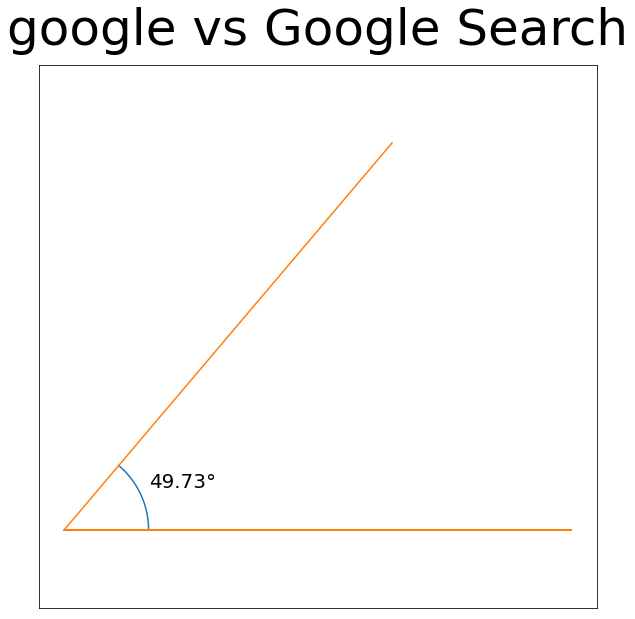

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity
from numpy import *
from matplotlib.pyplot import *
import re
try:
    print()
    query = input('Enter Search Term: ')
    print()
    query_vector = queryTFIDF.transform([query])
    query_vector_df = pd.DataFrame.sparse.from_spmatrix(data = query_vector)
    cos_sim = cosine_similarity(query_vector_df, index_df)
    cosine_similarity_df = pd.DataFrame(cos_sim, columns = [pages_db], index = ['confidence'])
    cosine_similarity_df = cosine_similarity_df.T.sort_values(by='confidence', ascending = False)
    cosine_similarity_df  = cosine_similarity_df.loc[~(cosine_similarity_df==0).all(axis=1)]
    print(cosine_similarity_df[:5])
    print()
    print()
    theta = np.arccos(cosine_similarity_df.iloc[0].to_numpy()[0])*57.2958
    t = linspace(0,theta,360)
    r=10
    l=60
    x = r*cos(radians(t))
    y = r*sin(radians(t))
    a=([0,l,0,l*cos(radians(theta))])
    b=([0,0,0,l*sin(radians(theta))])
    figure(figsize=(10, 10))
    xticks([])
    yticks([])
    text(10, 5, f"{theta:.2f}°", fontsize=20)
    plot(x,y,a,b)
    m = re.search(r"'(.*?)'", str(cosine_similarity_df.index[0]))
    title(f'{query} vs {m.group(1)}', fontdict={'fontsize': 50}, pad=20)
    axis('equal')
    show()
except:
    print('Oops! Well that didnt work!')